Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 56)          │          14,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 56)                  │         614,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 629,730 (2.40 MB)

 Trainable params: 629,730 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 1.1665 - sparse_categorical_accuracy: 0.5778 - val_loss: 0.6986 - val_sparse_categorical_accuracy: 0.7545
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.5521 - sparse_categorical_accuracy: 0.8013 - val_loss: 0.4737 - val_sparse_categorical_accuracy: 0.8278
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4677 - sparse_categorical_accuracy: 0.8232 - val_loss: 0.4902 - val_sparse_categorical_accuracy: 0.8273
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4438 - sparse_categorical_accuracy: 0.8426 - val_loss: 0.4306 - val_sparse_categorical_accuracy: 0.8478
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4545 - sparse_categorical_accuracy: 0.8380 - val_loss: 0.4102 - val_sparse_categorical_accuracy: 0.8527
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4024 - sparse_categorical_accuracy: 0.8567 - val_loss: 0.3838 - val_sparse_categorical_accuracy: 0.862

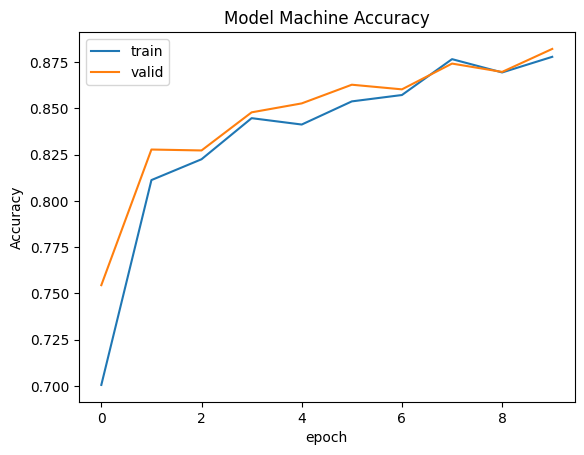

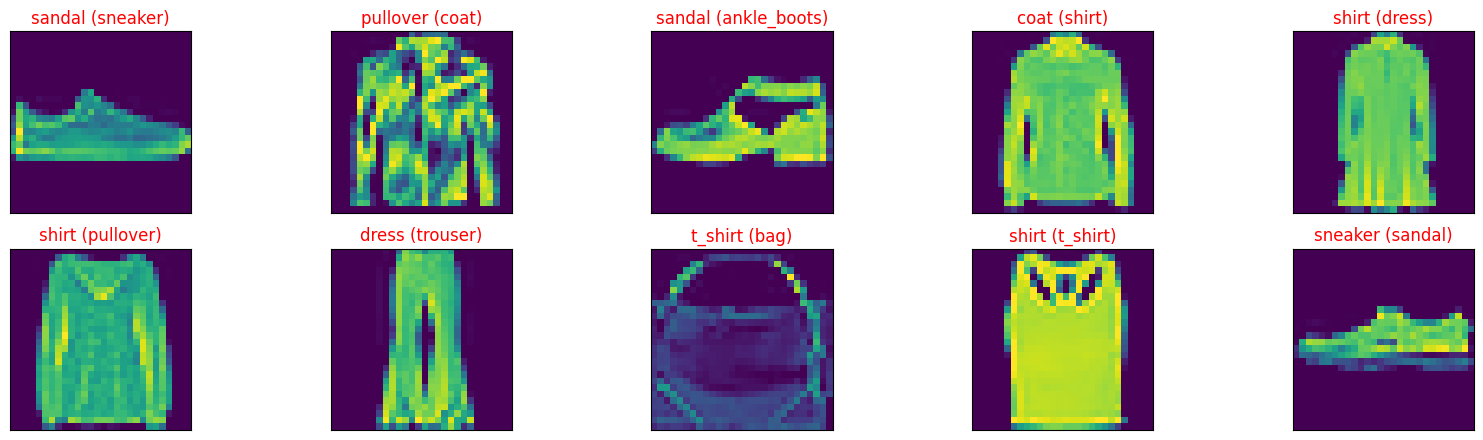

In [6]:
import tensorflow as tf
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#Adam optimizer
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

#normalize to [0,1]
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

#changing input data from (28,28) to (28,28,1)
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

#splitting training data to training and validation
(trainXdata, validX) = trainX[:48000], trainX[48000:]
(trainYdata, validY) = trainY[:48000], trainY[48000:]

def model_machine():
    models = Sequential()
    #28 filters with kernal size 3x3
    models.add(Conv2D(28, (3, 3), padding = "same", activation="relu", input_shape=(28,28,1)))
    #max pooling 2x2
    models.add(MaxPooling2D(pool_size=(2,2)))
    #56 filters with kernal size 3x3
    models.add(Conv2D(56, (3,3), padding = "same", activation="relu"))

    #flattens layer into one vector
    models.add(Flatten())
    #adding fully connected layers
    models.add(Dense(56, activation="relu"))
    models.add(Dense(10, activation="softmax"))
    return models
    
model = model_machine()

model.compile(optimizer =Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

history = model.fit(trainXdata, trainYdata, batch_size=32, epochs=10, steps_per_epoch=100, validation_data=(validX, validY))
model.save_weights('./model.weights.h5', overwrite=True)

#accuracy on y axis epoch on x axis
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Machine Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
#evaluate accuracy on test set
print(model.evaluate(testX, testY, steps=100, return_dict=True))

labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

figure = plt.figure(figsize=(20,8))
counter = 0
already_labelled = []
#predicting on test data
predictions = model.predict(testX)
for index in range (testX.shape[0]):
    label = labels[np.argmax(predictions[index])]
    true_label = labels[testY[index]]
    if(label != true_label):
        if(not (true_label in already_labelled)):
            
            graph = figure.add_subplot(3,5, counter+1, xticks=[], yticks=[])
            graph.imshow(np.squeeze(testX[index]))
            graph.set_title("{} ({})".format(label, true_label), color= "red")
            already_labelled.append(true_label)
            counter += 1
            if(counter >= 15):
                break
plt.show()





test accuracy is 0.8755999803543091